### Linear Regression Model for Boom Bikes

Problem Statement: 

BoomBikes is in the business of Bike Sharing where the business rents the bikes for a price or free. Due to ongoing Corona pandemic the business has sufferred. So, the company has decided to come up with a business plan which will help revive revenues and make profit. So, the compnay wants to know the factors which affect the demand for the shared bikes in American market. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

**Business Goal**
1. To model the demand for shared bikes with the available independent variables. 
2. The model should help to understand how exactly the demands vary with different features. 
3. The model may help management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

**Libraries**

In [156]:
# Load the required Libraries

# 1. pandas for dataframe utilities
import pandas as pd
print('pandas version\t:',pd.__version__)

# 2. numpy for numerical utilities
import numpy as np
print('numpy version\t:',np.__version__)

# 3. seaborn for data visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

# 4. matplotlib.pyplot for chart/graph plotting
import matplotlib.pyplot as plt
#print('matplotlib version\t:',plt.__version__)

# 5. plotly.express for chart/graph plotting
import plotly.express as px #plotting
#print('plotly version\t:',px.__version__)

# 6. datetime for date/time functions
import datetime as dt

# 7. warnings to ignore known warnings
import warnings #warning
warnings.filterwarnings('ignore')

# 8. python version
import platform
print('Python version\t:',platform.python_version())

pandas version	: 2.1.4
numpy version	: 1.26.4
seaborn version	: 0.13.2
Python version	: 3.11.7


In [46]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [47]:
import numpy as np
import pandas as pd

In [264]:
bikes = pd.read_csv("day.csv")

In [265]:
# Check the head of the dataset
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Inspect the various aspects of the housing dataframe

In [266]:
bikes.shape

(730, 16)

In [267]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [268]:
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

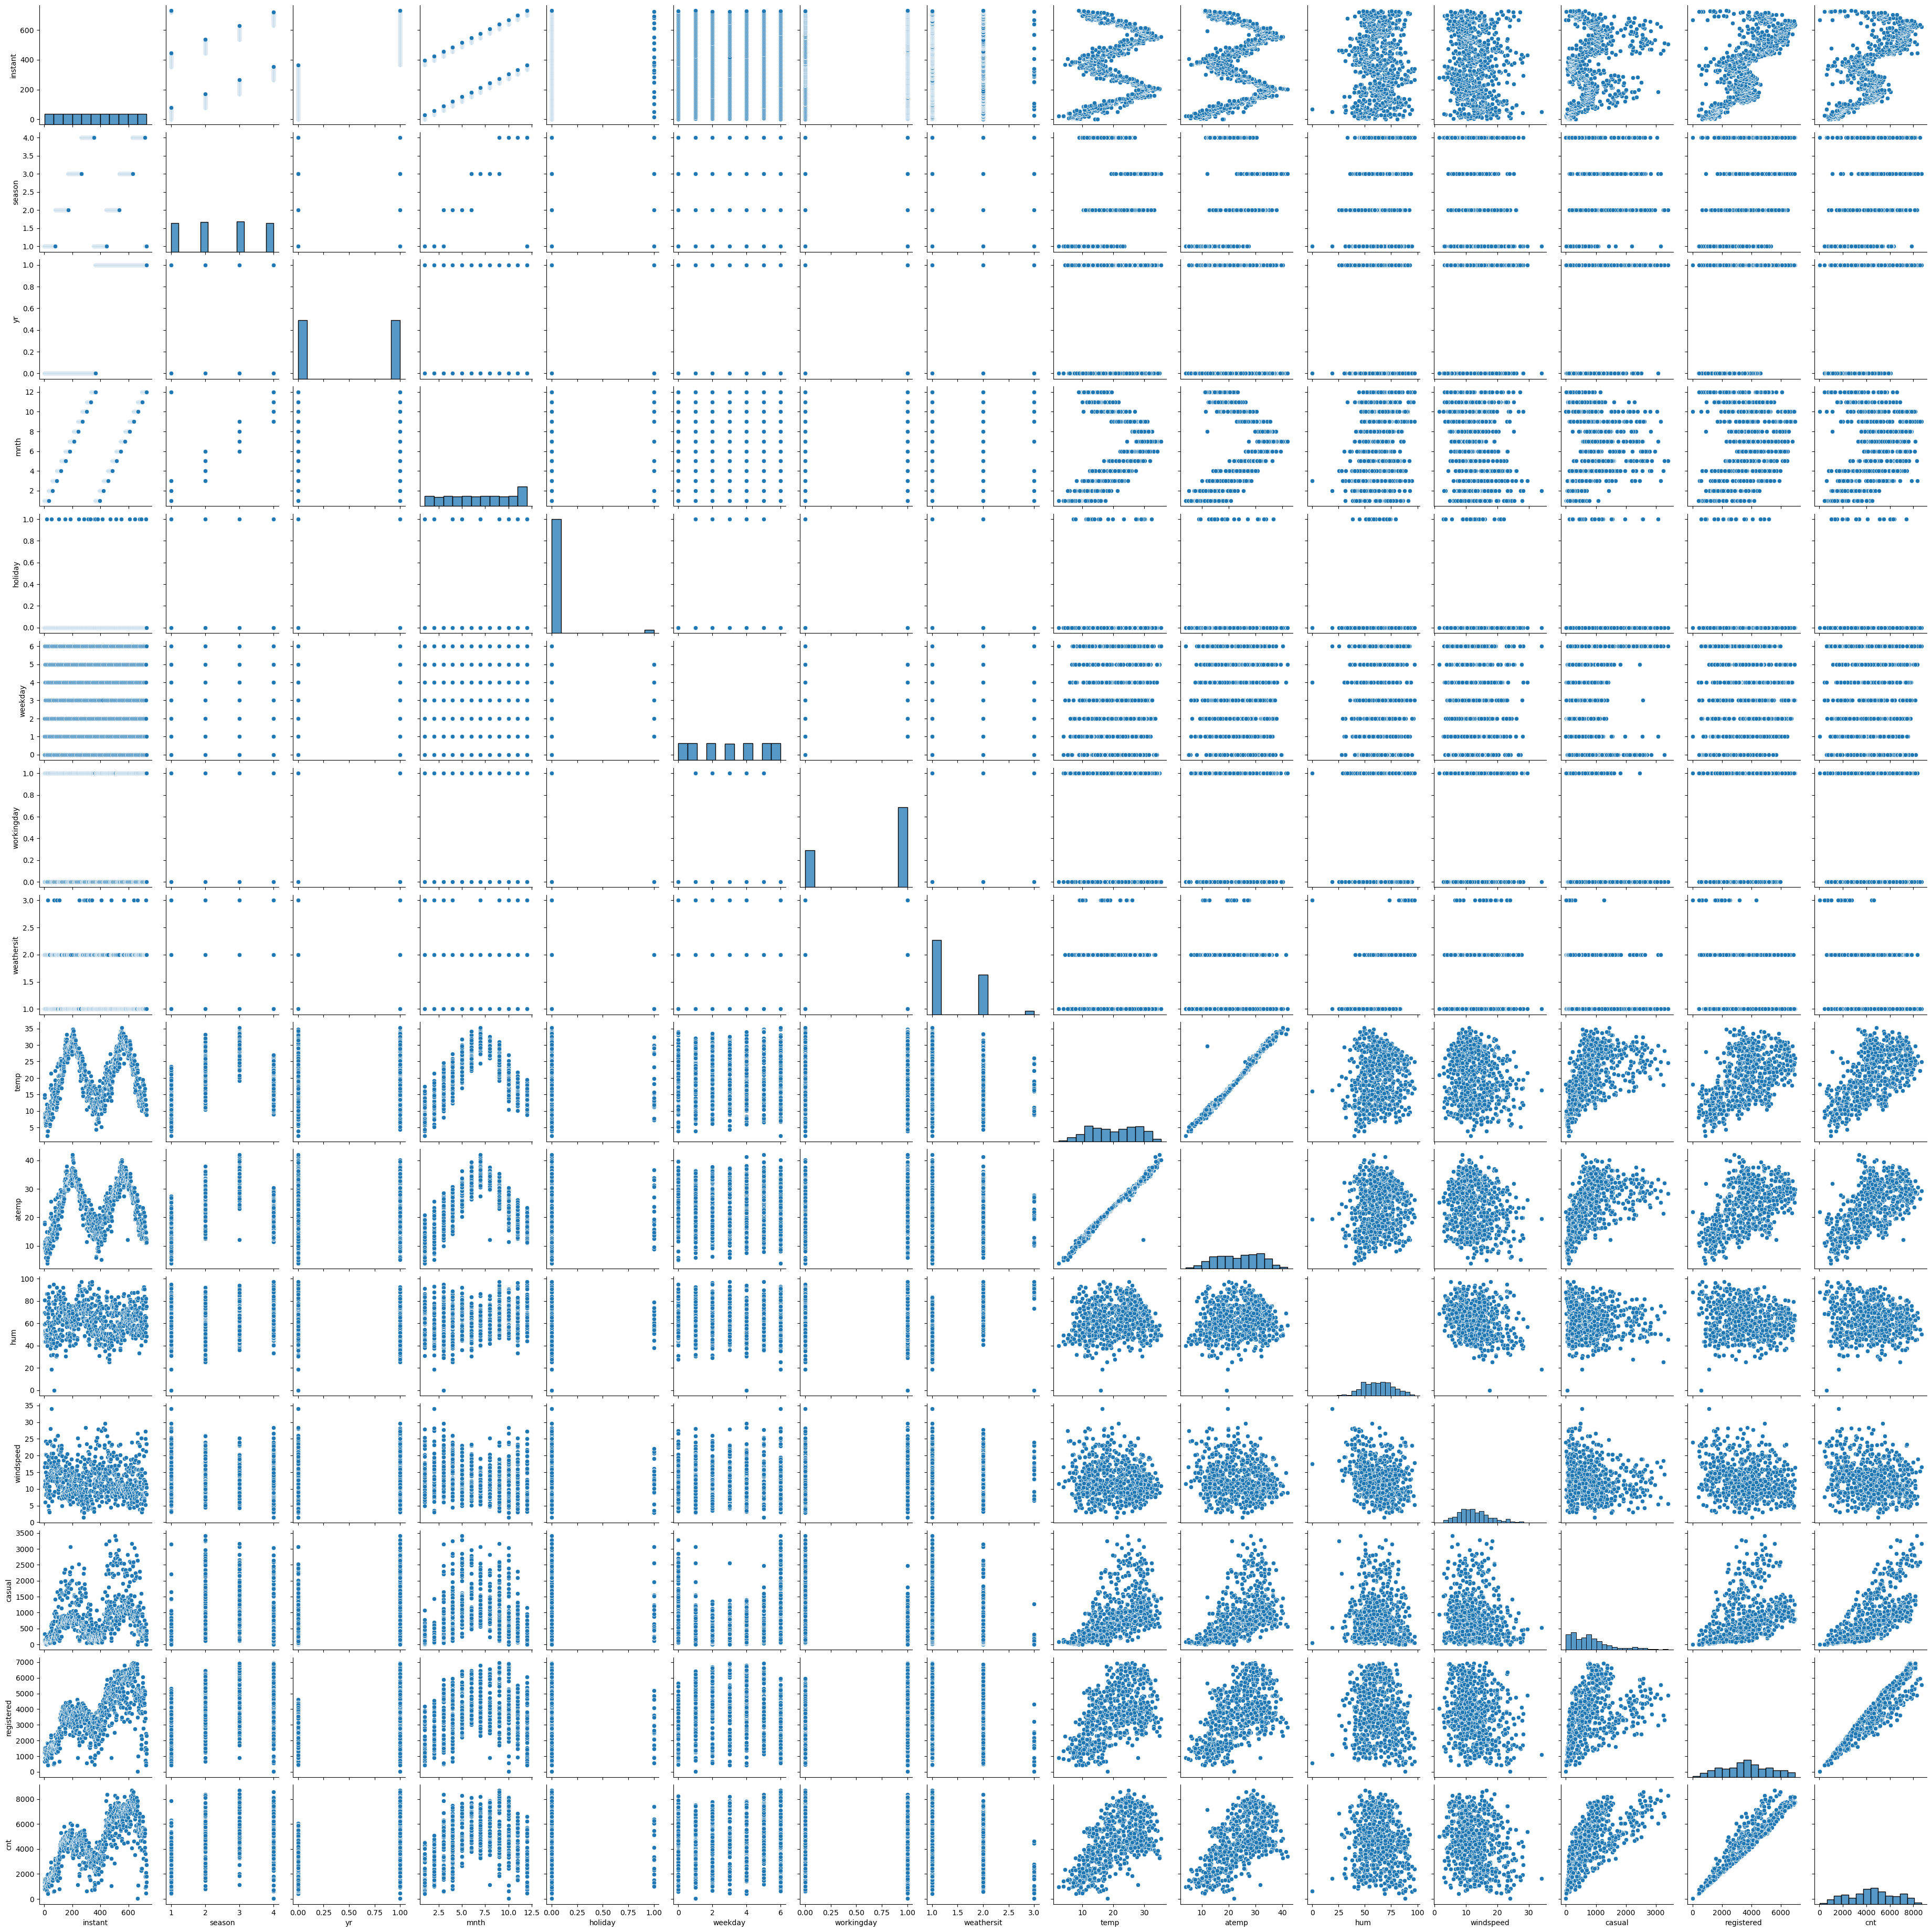

In [163]:
sns.pairplot(bikes)
plt.show()

**Insight**

atemp and temp seem to have some Linear relationship with cnt as seen in the scatter plot.

#### Visualising Categorical Variables

These are season, mnth, weathersit, holiday, weekday, workingday

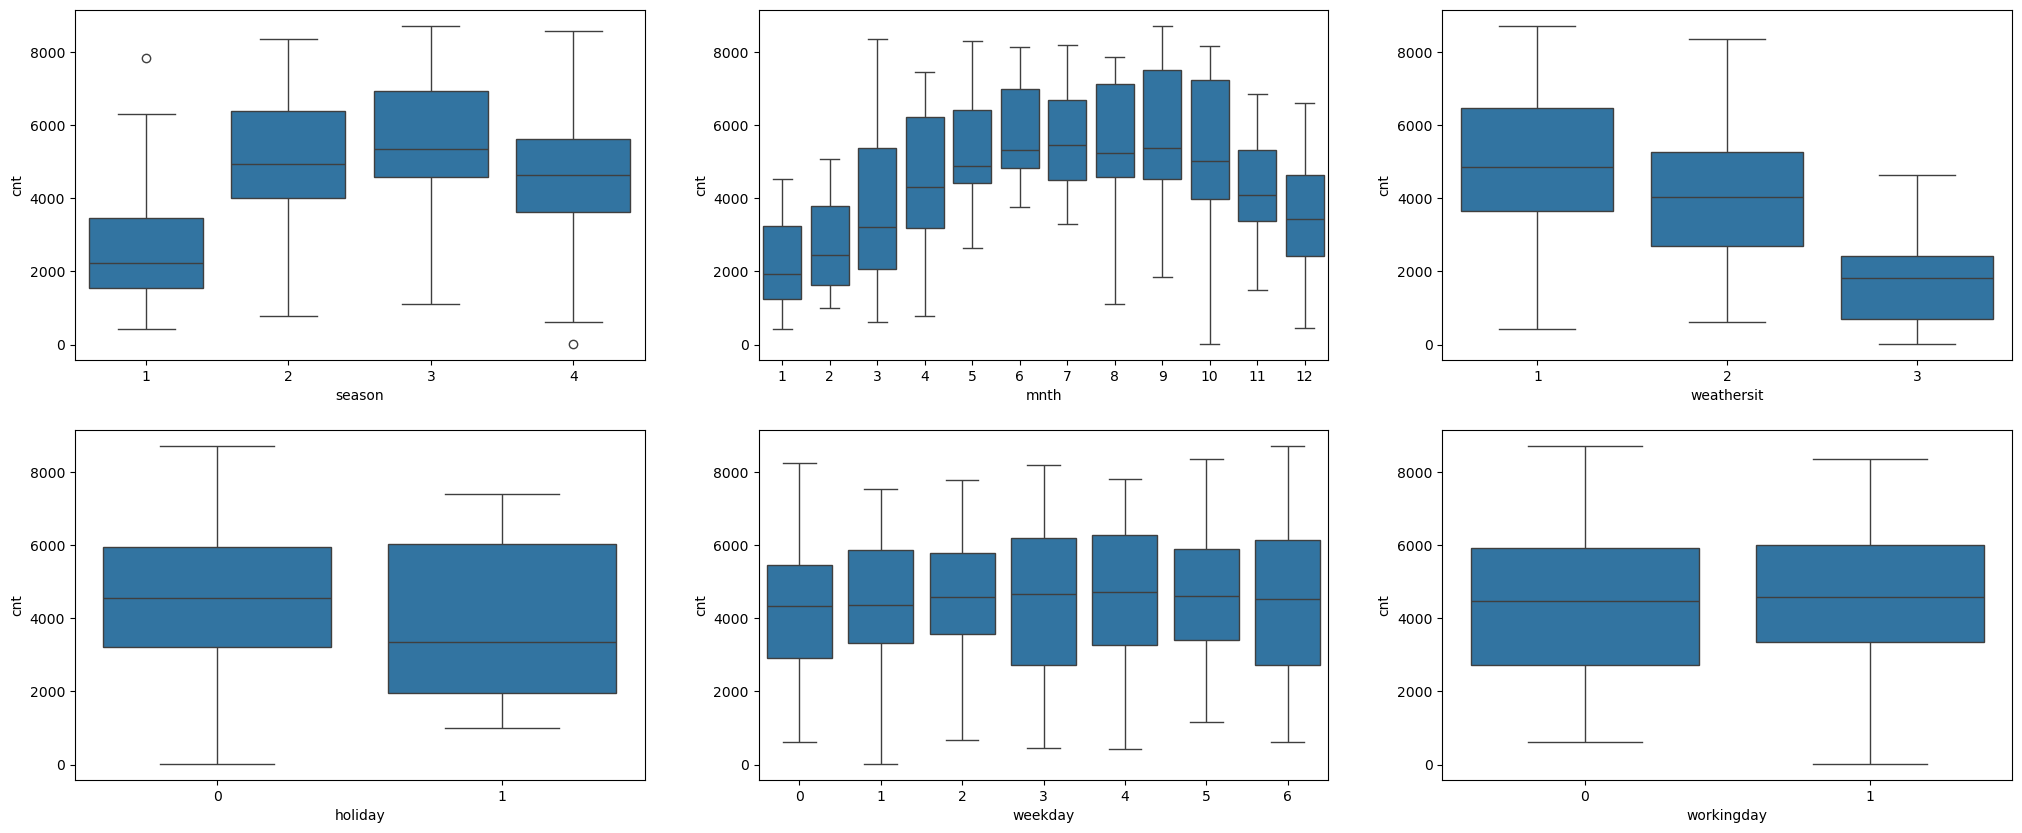

In [269]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

Insights
There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

**season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

**mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

**weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

**holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

**weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

**workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

#### Cross check Categorical features against each other

Let's visualise some of these categorical features by using the hue argument. 
Below are some plots 

**season with holiday as the hue**

season (1:spring, 2:summer, 3:fall, 4:winter)

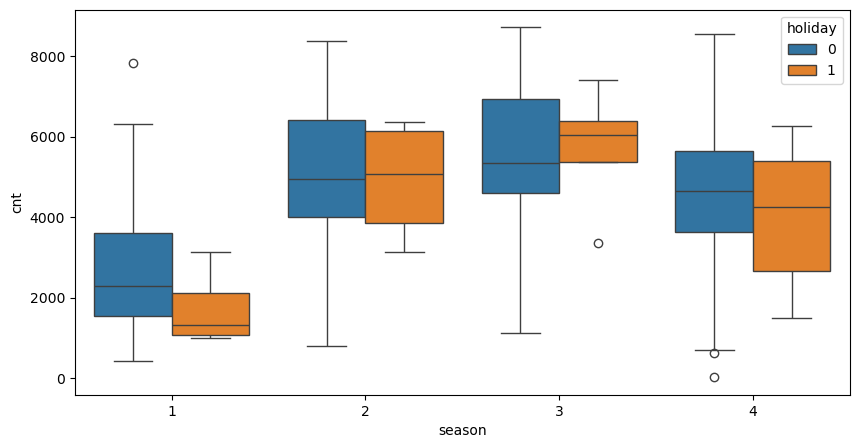

In [270]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bikes)
#sns.boxplot(x = 'holiday', y = 'cnt', hue = 'weathersit', data = bikes)
plt.show()

**holiday with weathersit as the hue**

weathersit : 

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

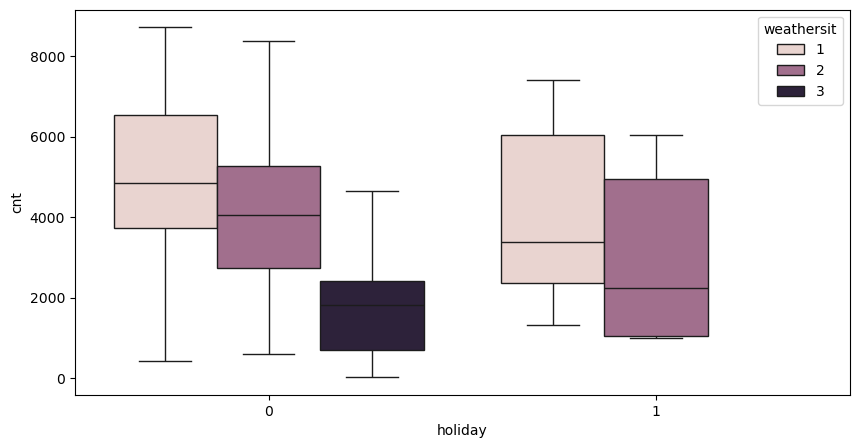

In [271]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'weathersit', data = bikes)
plt.show()

## Data Preparation ##

**Removing the columns which are not required**

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

**instant** : Its only an index value

**dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

**casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [272]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [273]:
bikes_new=bikes[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [274]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Dummy Variables ##

As per the Data dictionary and a general understanding, following are the candidate variables for which we can create Dummy variables
- season
- mnth
- weekday
- weathersit

So, here is what needs to be done

1. Convert these variables into Categorical variables
2. Drop the original variable for which the dummy was created
3. Drop first dummy variable for each set of dummies created.

In [275]:
# Check the datatypes before convertion
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [276]:
# Convert to 'category' data type

bikes_new['season']=bikes_new['season'].astype('category')
bikes_new['weathersit']=bikes_new['weathersit'].astype('category')
bikes_new['mnth']=bikes_new['mnth'].astype('category')
bikes_new['weekday']=bikes_new['weekday'].astype('category')

In [277]:
# Check the datatypes after conversion
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [278]:
# Create the dummy variable, drop the original variable and drop the first dummy variable
bikes_new = pd.get_dummies(bikes_new, drop_first=True, dtype=np.uint8)
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [279]:
bikes_new.shape

(730, 30)

## Splitting the Data into Training and Testing Sets

We will split the data into TRAIN and TEST dataset (70:30 ratio)

**Libraries**

In [280]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes_new, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

There is a lot of variation in the numerical value of all the columns. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. So, this will create problems at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling.

In [176]:
from sklearn.preprocessing import MinMaxScaler

In [177]:
scaler = MinMaxScaler()

In [281]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [282]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
653  0.864243         0         0  ...        0        0          0   
576  0.827658         0         1  ...        0        0          0   
426  0.465255         0         0  ...        0        0          0   
728  0.204096         0         0  ...        0        1          0   
482  0.482973         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
653          1          0          0          0          0             0   
576          1          0          0          0          0             0   
426          0          0          0          0          1             1   
728          0          0          0          0          0             0   
482          0          0          0          0          1             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 30 columns]

In [283]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.245098    0.262745  ...    0.086275   
std      0.169797    0.224593    0.430568    0.440557  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.150980    0.131373    0.158824    0.133333    0.127451   
std      0.278131    0.358381    0.338139    0.365870    0.340268    0.333805   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  510.000000    510.000000    510.000000  
mean     0.154902      0.343137      0.029412  
std      0.362166      0.475223      0.169124  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

## Correlation Matrix ##

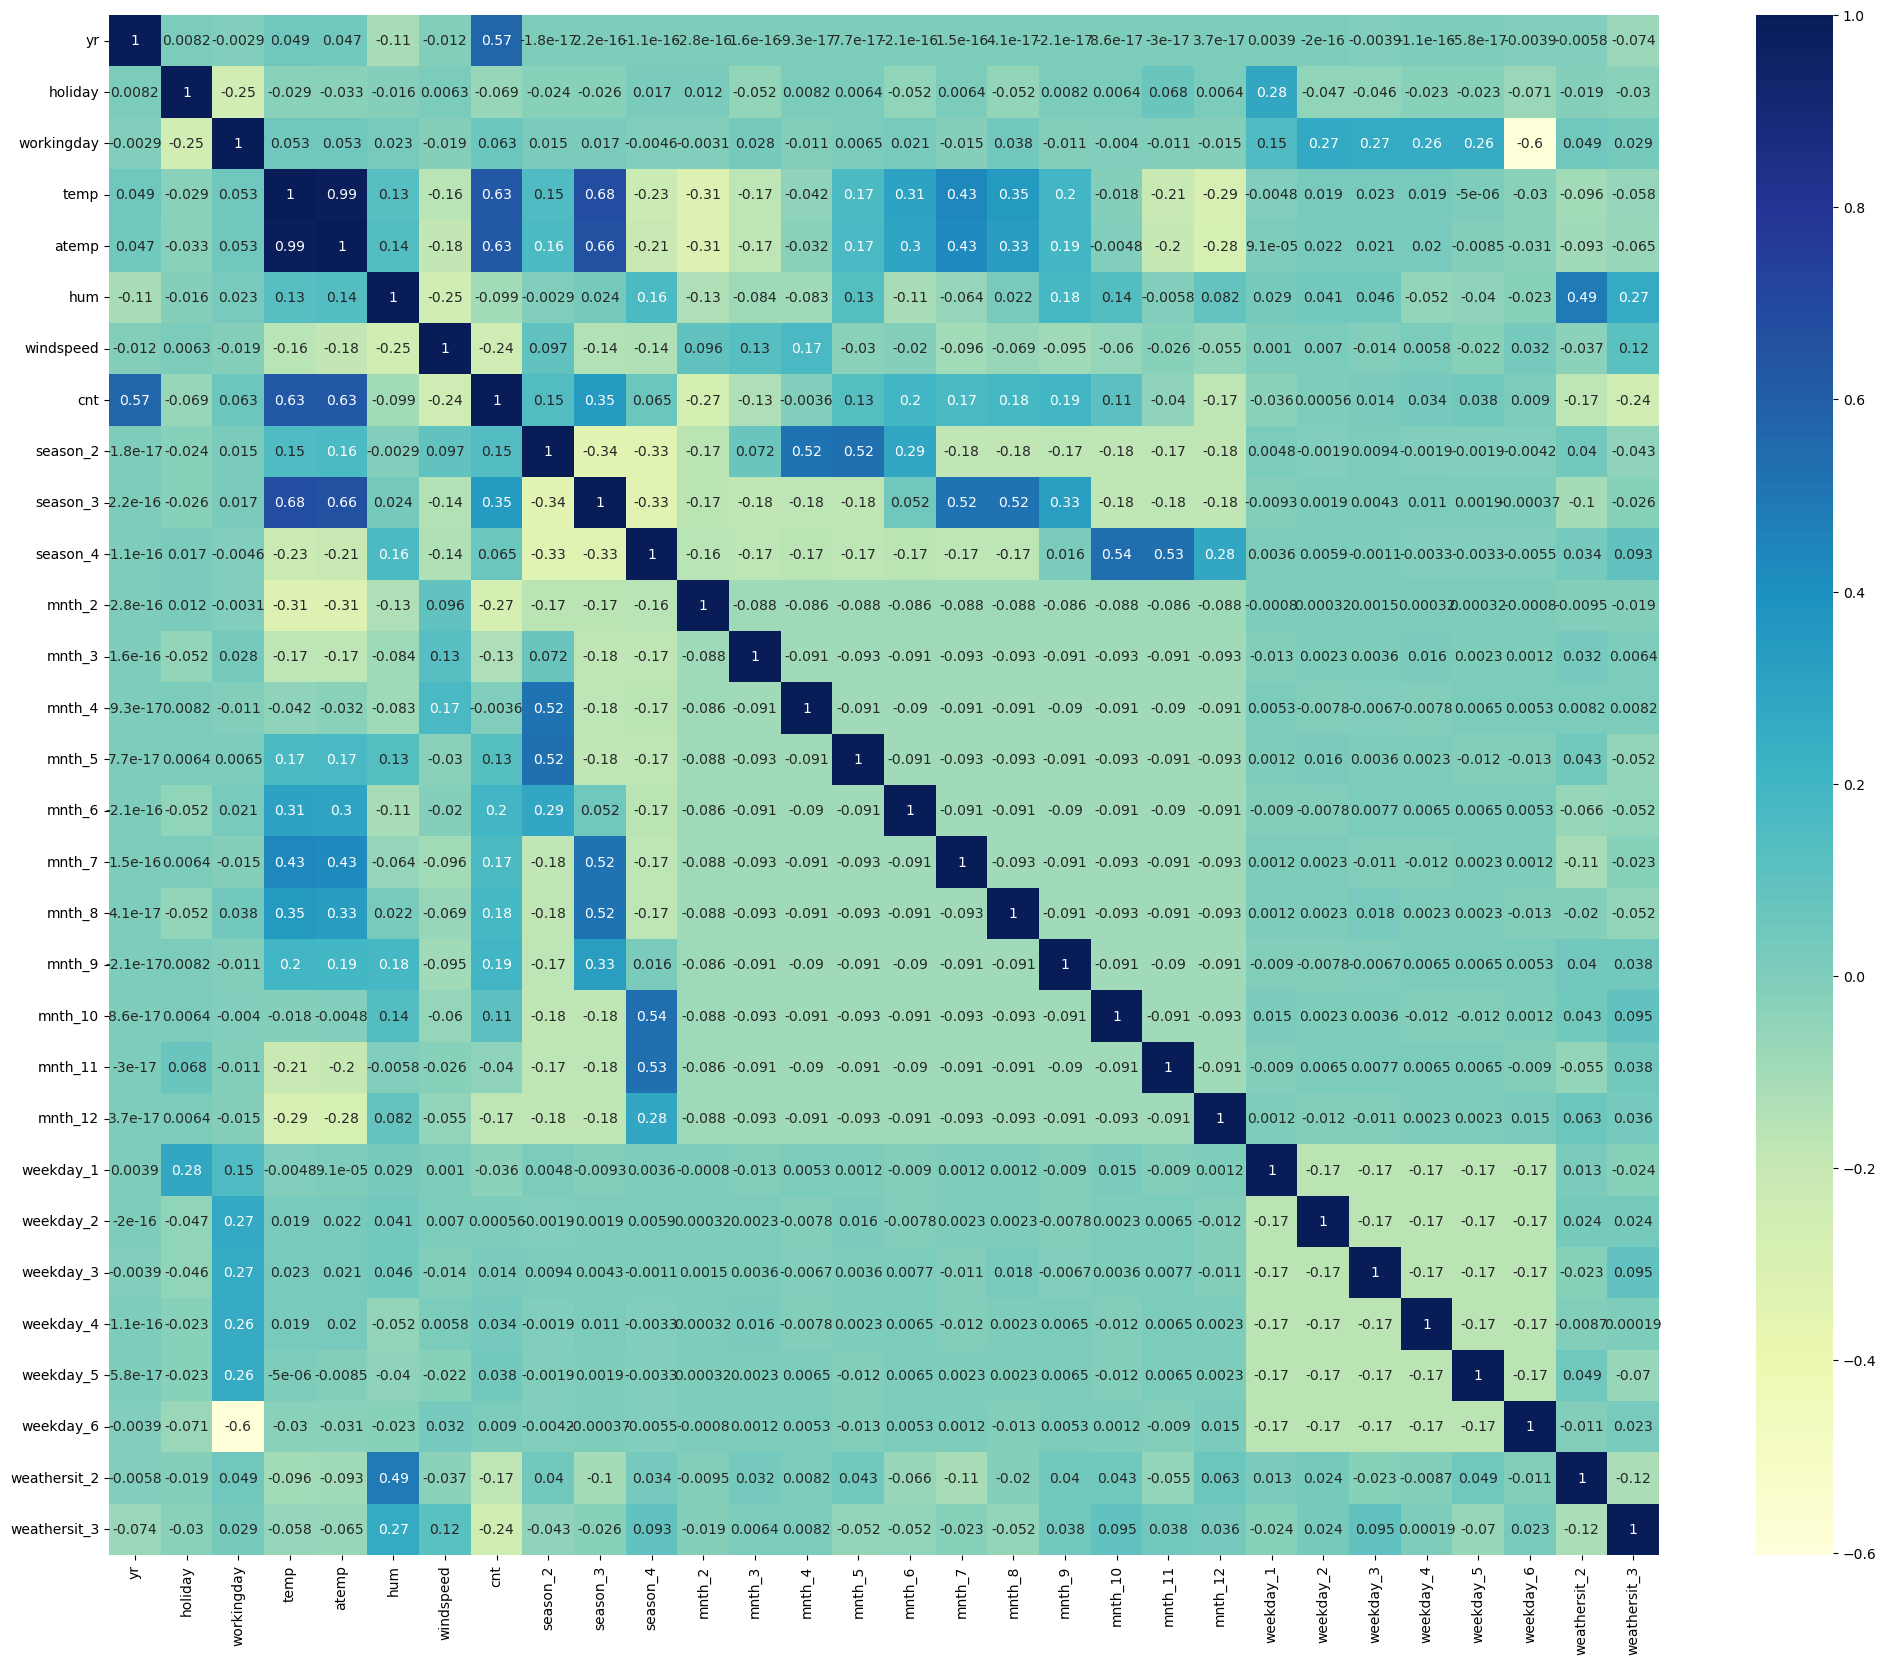

In [284]:
# Correlation coefficients to understand highly correlated variables

plt.figure(figsize = (25, 20))
sns.heatmap(bikes_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Insight**

From the heatmap it is very clear that the temp and atemp have high correlation with cnt. Since temp and atemp seem to be highly correlated, considering only temp and plotting a pairplot with cnt.

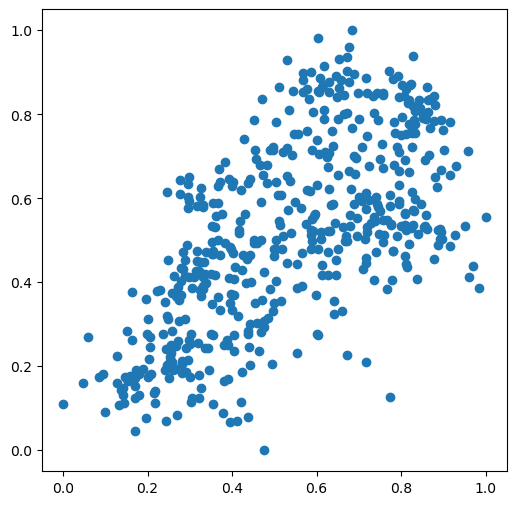

In [285]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

**Dividing into X and Y sets for the model building**

In [286]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. 

In [287]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [288]:
# Check the parameters obtained

lr1.params

const    0.169798
temp     0.639952
dtype: float64

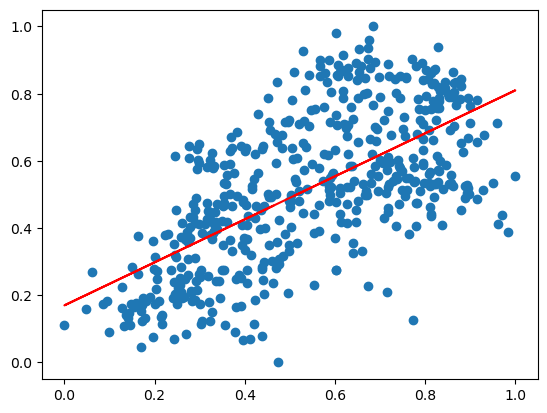

In [289]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm1.iloc[:, 1], y_train)
plt.plot(X_train_lm1.iloc[:, 1], 0.170 + 0.640*X_train_lm1.iloc[:, 1], 'r')
plt.show()

In [290]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 29 May 2024   Prob (F-statistic):           5.80e-61
Time:                        18:21:35   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is `0.414`. 
Since we some more variables, we can try adding another variable to see if R-squared can be increased
So let's try the next highly correlated variable 'atemp'.

In [291]:
# Assign all the feature variables to X
X_train_lm2 = X_train[['temp', 'atemp']]

In [292]:
# Build a linear model

import statsmodels.api as sm
X_train_lm2 = sm.add_constant(X_train_lm2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params

const    0.163383
temp     0.181818
atemp    0.492316
dtype: float64

In [293]:
# Check the summary
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.95e-60
Time:                        18:21:39   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

**There is a very minor increase in R-squared hence lets remove the 'atemp' and add 'season_3' since it is the next in the correlation hierarchy.**

In [294]:
# Assign all the feature variables to X
X_train_lm3 = X_train[['temp', 'season_3']]

In [295]:
# Build a linear model

import statsmodels.api as sm
X_train_lm3 = sm.add_constant(X_train_lm3)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params

const       0.133875
temp        0.744330
season_3   -0.076711
dtype: float64

In [296]:
# Print the summary of the model-3

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 29 May 2024   Prob (F-statistic):           8.59e-62
Time:                        18:21:44   Log-Likelihood:                 179.95
No. Observations:                 510   AIC:                            -353.9
Df Residuals:                     507   BIC:                            -341.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1339      0.022      5.951      0.0

**There is some increase in R-squared, so lets keep season_3 and see if their some other variable that we can use**

### Adding all the variables to the model

In [297]:
#Build a linear model

import statsmodels.api as sm
X_train_lm4 = sm.add_constant(X_train)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params

const           0.175618
yr              0.232208
holiday        -0.042394
workingday      0.043879
temp            0.401322
atemp           0.050628
hum            -0.151812
windspeed      -0.184388
season_2        0.086796
season_3        0.048580
season_4        0.153968
mnth_2          0.030389
mnth_3          0.063853
mnth_4          0.062565
mnth_5          0.087257
mnth_6          0.060862
mnth_7          0.023289
mnth_8          0.078641
mnth_9          0.144371
mnth_10         0.070260
mnth_11         0.020783
mnth_12         0.016994
weekday_1      -0.009946
weekday_2      -0.007753
weekday_3       0.005823
weekday_4       0.001806
weekday_5       0.011556
weekday_6       0.054533
weathersit_2   -0.061030
weathersit_3   -0.256697
dtype: float64

In [298]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.42e-181
Time:                        18:21:49   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1756      0.030      5.777   

### Checking VIF

In [299]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [300]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
24     weekday_4     inf
2     workingday     inf
23     weekday_3     inf
22     weekday_2     inf
21     weekday_1     inf
25     weekday_5     inf
1        holiday     inf
3           temp  447.70
4          atemp  383.54
5            hum   20.79
8       season_3   15.42
16        mnth_8   11.01
9       season_4   10.93
15        mnth_7    9.62
7       season_2    8.88
14        mnth_6    7.35
17        mnth_9    7.34
13        mnth_5    7.16
18       mnth_10    6.64
19       mnth_11    5.99
12        mnth_4    5.64
6      windspeed    4.71
20       mnth_12    3.78
11        mnth_3    3.06
27  weathersit_2    2.21
0             yr    2.09
26     weekday_6    1.93
10        mnth_2    1.71
28  weathersit_3    1.23

**Some columns have very high VIF. So, barring following columns windspeed, mnth_12, mnth_3, weathersit_2, yr, weekday_6, mnth_2, weathersit_3 all other columns are showing very high VIF. So, we will keep only temp from high VIF columns and drop others.**

In [301]:
X_train_lm5 = X_train[['temp', 'windspeed','mnth_12','mnth_3','mnth_2','weathersit_2','weathersit_3','yr','weekday_6',]]


In [302]:
# Build a linear model

import statsmodels.api as sm
X_train_lm5 = sm.add_constant(X_train_lm5)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.params

const           0.214501
temp            0.506758
windspeed      -0.173376
mnth_12        -0.002581
mnth_3         -0.023112
mnth_2         -0.085715
weathersit_2   -0.070915
weathersit_3   -0.244469
yr              0.234328
weekday_6       0.020588
dtype: float64

In [303]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.12e-152
Time:                        18:22:01   Log-Likelihood:                 411.04
No. Observations:                 510   AIC:                            -802.1
Df Residuals:                     500   BIC:                            -759.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2145      0.021     10.463   

In [304]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [305]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm5.values, i) for i in range(X_train_lm5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  17.99
1          temp   1.37
5        mnth_2   1.18
3       mnth_12   1.17
4        mnth_3   1.11
2     windspeed   1.08
6  weathersit_2   1.03
7  weathersit_3   1.03
8            yr   1.02
9     weekday_6   1.01

So, now we have 
- R-squared:                       0.768
- Adj. R-squared:                  0.764
- F-statistic:                     183.9
- Prob (F-statistic):          2.12e-152

In [306]:
X_train_lm6 = X_train[['temp', 'windspeed','mnth_2','weathersit_2','weathersit_3','yr']]


In [307]:
# Build a linear model

import statsmodels.api as sm
X_train_lm6 = sm.add_constant(X_train_lm6)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.params

const           0.212687
temp            0.512790
windspeed      -0.175954
mnth_2         -0.082043
weathersit_2   -0.070477
weathersit_3   -0.243746
yr              0.233718
dtype: float64

In [308]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     274.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.10e-155
Time:                        18:22:20   Log-Likelihood:                 408.93
No. Observations:                 510   AIC:                            -803.9
Df Residuals:                     503   BIC:                            -774.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2127      0.019     11.435   

In [309]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [310]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm6.values, i) for i in range(X_train_lm6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  14.77
1          temp   1.15
3        mnth_2   1.11
2     windspeed   1.05
4  weathersit_2   1.03
5  weathersit_3   1.03
6            yr   1.02

So, now we have 
- R-squared:                       0.766
- Adj. R-squared:                  0.763
- F-statistic:                     274.5
- Prob (F-statistic):          4.10e-155

**This Iteration 6 - Model seems to be the right model as we have the right values for 
R-Squared, Adjusted R-squared, F-Statistic, Prob (F-statistic). Additionally, the p-values of all the variables is also zero. So, finalizing this model for further evaluation.**

**Insights**

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# ASSUMPTIONS

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [311]:
y_train_cnt = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

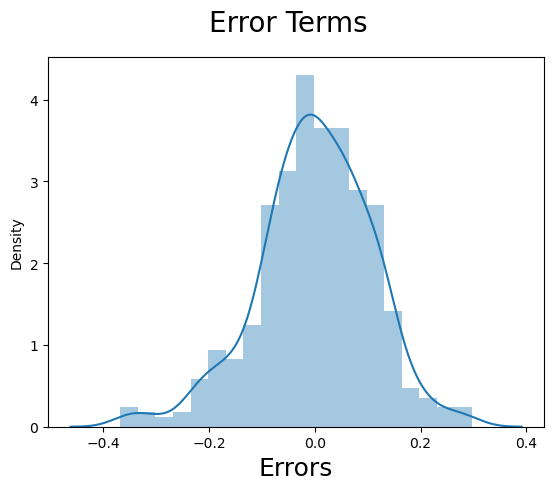

In [312]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Linear relationship between X and Y

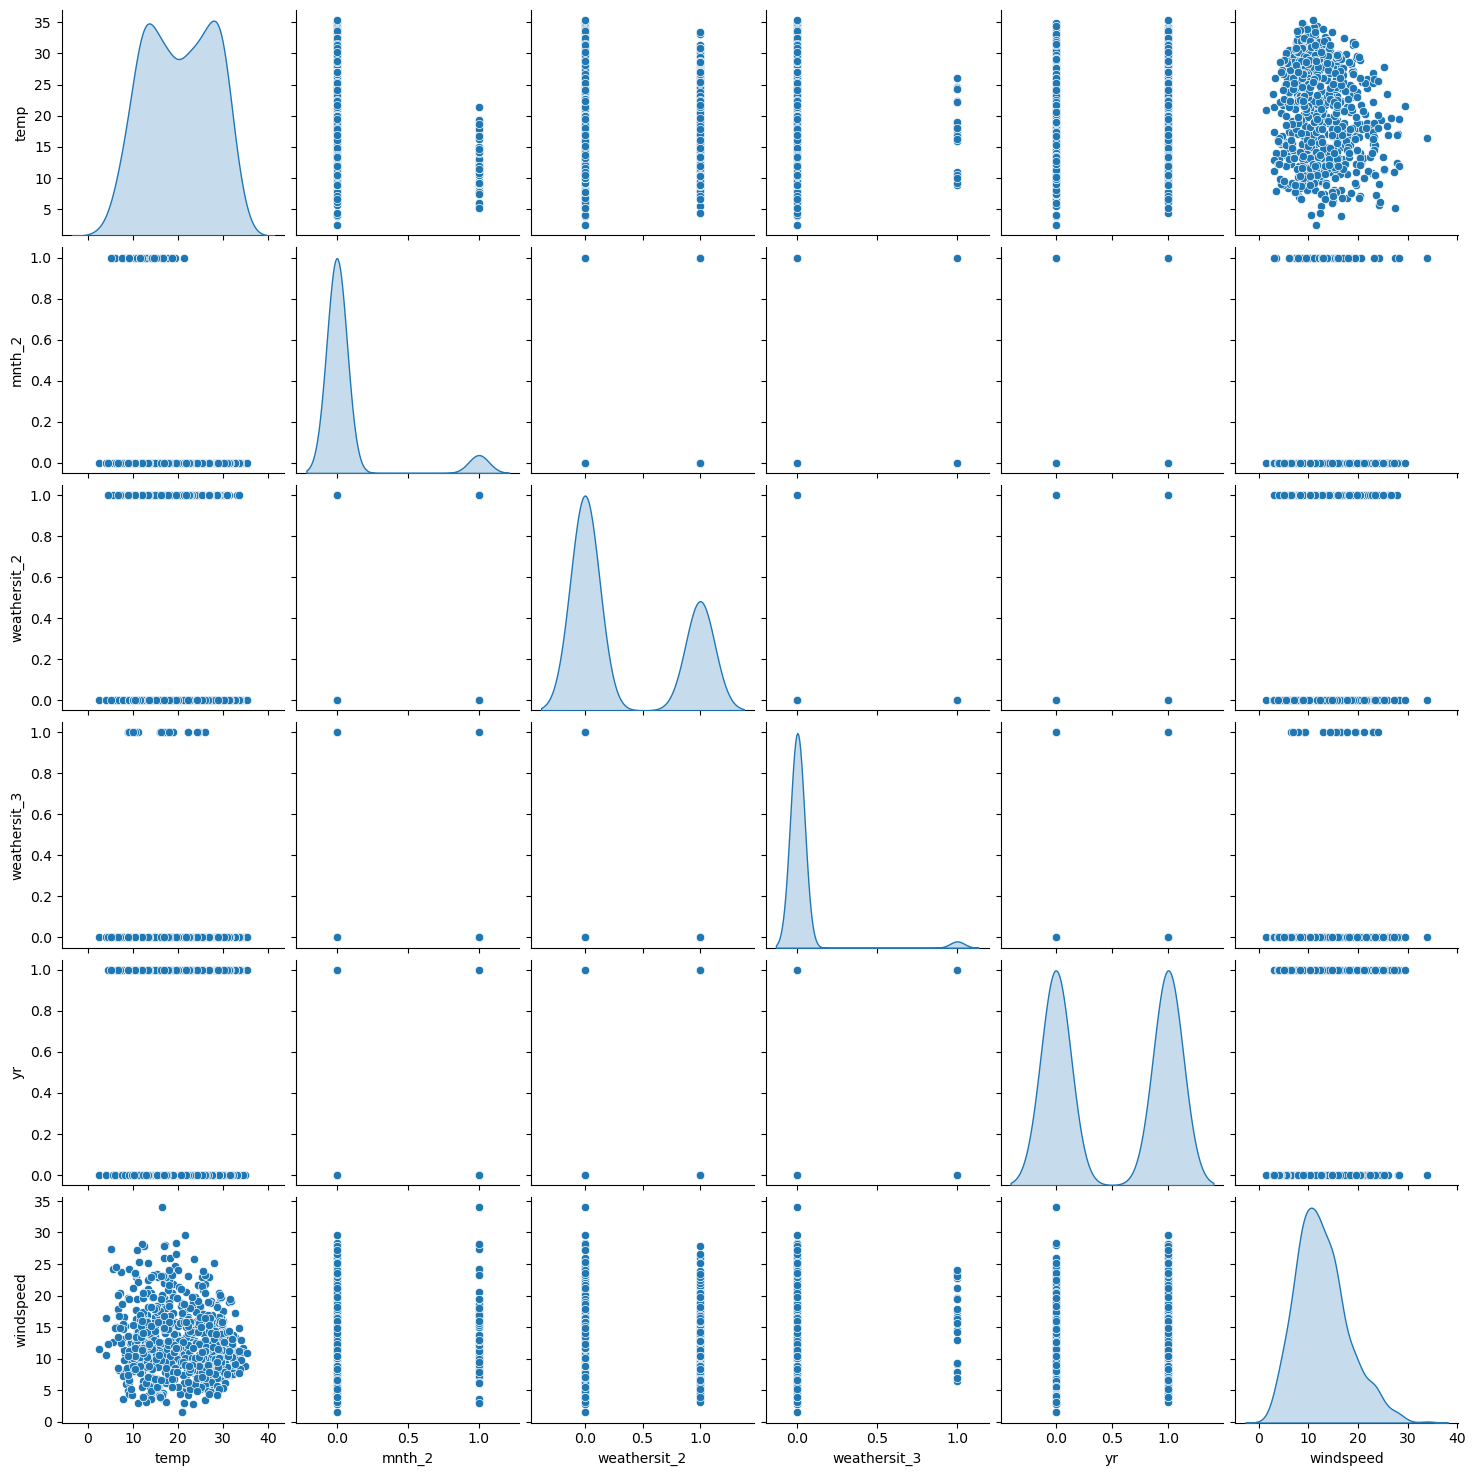

In [332]:
bikes_new=bikes_new[[ 'temp', 'mnth_2', 'weathersit_2', 'weathersit_3','yr','windspeed']]

sns.pairplot(bikes_new, diag_kind='kde')
plt.show()

## No Multicollinearity between the predictor variables

In [333]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm6.values, i) for i in range(X_train_lm6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  14.77
1          temp   1.15
3        mnth_2   1.11
2     windspeed   1.05
4  weathersit_2   1.03
5  weathersit_3   1.03
6            yr   1.02

### Insight
From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [335]:
#num_vars = ['temp', 'atemp','hum','windspeed','cnt']

num_vars = ['temp', 'windspeed','mnth_2','weathersit_2','weathersit_3','yr']
df_test[num_vars] = scaler.transform(df_test[num_vars])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- mnth_2
- weathersit_2
- weathersit_3
- yr
Feature names seen at fit time, yet now missing:
- atemp
- cnt
- hum


In [314]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630   -0.110539   -0.121260   -0.346747   
std      0.500722    0.188034    0.459904    0.008075    0.006272    0.002802   
min      0.000000    0.000000    0.000000   -0.128243   -0.135855   -0.353829   
25%      0.000000    0.000000    0.000000   -0.117599   -0.126678   -0.348839   
50%      0.000000    0.000000    1.000000   -0.110548   -0.120793   -0.346949   
75%      1.000000    0.000000    1.000000   -0.103623   -0.116045   -0.344764   
max      1.000000    1.000000    1.000000   -0.095837   -0.108365   -0.339908   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean    -0.040807   -0.055379    0.264840    0.246575  ...    0.073059   
std      0.007099    0.000030    0.442259    0.432005  ...    0.260830   
min     -0.056614   -0.055444    0.000000    0.000000  ...    0.000000   
25%     -0.045904   -0.055399    0.000000    0.000000  ...    0.000000   
50%     -0.041424   -0.055378    0.000000    0.000000  ...    0.000000   
75%     -0.036826   -0.055358    1.000000    0.000000  ...    0.000000   
max     -0.018877   -0.055318    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.127854    0.164384    0.100457    0.164384    0.178082   
std      0.282125    0.334692    0.371472    0.301297    0.371472    0.383458   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  219.000000    219.000000    219.000000  
mean     0.118721      0.319635      0.027397  
std      0.324202      0.467403      0.163612  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

#### Dividing into X_test and y_test

In [334]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

KeyError: 'cnt'

In [323]:
X_test

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0 -0.101112 -0.114447 -0.346392  -0.050976   
535   1        0           1 -0.098708 -0.112348 -0.347280  -0.047891   
299   0        0           1 -0.112163 -0.122320 -0.343000  -0.039882   
221   0        0           1 -0.099389 -0.113708 -0.350534  -0.039644   
152   0        0           1 -0.101614 -0.115258 -0.352844  -0.030863   
..   ..      ...         ...       ...       ...       ...        ...   
400   1        0           0 -0.120953 -0.129595 -0.345423  -0.041958   
702   1        0           1 -0.111912 -0.121867 -0.344535  -0.042137   
127   0        0           0 -0.109651 -0.119982 -0.346513  -0.051629   
640   1        0           1 -0.104090 -0.116951 -0.343372  -0.052401   
72    0        0           1 -0.118397 -0.127045 -0.349124  -0.045686   

     season_2  season_3  season_4  ...  mnth_11  mnth_12  weekday_1  \
184         0         1         0  ...        0        0          1   
535         1         0         0  ...        0        0          0   
299         0         0         1  ...        0        0          0   
221         0         1         0  ...        0        0          0   
152         1         0         0  ...        0        0          0   
..        ...       ...       ...  ...      ...      ...        ...   
400         0         0         0  ...        0        0          0   
702         0         0         1  ...        0        1          0   
127         1         0         0  ...        0        0          0   
640         0         0         1  ...        0        0          0   
72          0         0         0  ...        0        0          1   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
184          0          0          0          0          0             1   
535          0          1          0          0          0             0   
299          0          0          1          0          0             1   
221          0          1          0          0          0             0   
152          0          0          1          0          0             0   
..         ...        ...        ...        ...        ...           ...   
400          0          0          0          0          0             1   
702          1          0          0          0          0             0   
127          0          0          0          0          0             0   
640          0          1          0          0          0             1   
72           0          0          0          0          0             0   

     weathersit_3  
184             0  
535             0  
299             0  
221             0  
152             0  
..            ...  
400             0  
702             0  
127             0  
640             0  
72              0  

[219 rows x 29 columns]

In [324]:
# Adding constant variable to test dataframe
# cnt=0.236×𝑎𝑟𝑒𝑎+0.202×𝑏𝑎𝑡ℎ𝑟𝑜𝑜𝑚𝑠+0.11×𝑠𝑡𝑜𝑟𝑖𝑒𝑠+0.05×𝑚𝑎𝑖𝑛𝑟𝑜𝑎𝑑+0.04×𝑔𝑢𝑒𝑠𝑡𝑟𝑜𝑜𝑚+0.0876×ℎ𝑜𝑡𝑤𝑎𝑡𝑒𝑟ℎ𝑒𝑎𝑡𝑖𝑛𝑔+0.0682×𝑎𝑖𝑟𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛𝑖𝑛𝑔+0.0629×𝑝𝑎𝑟𝑘𝑖𝑛𝑔+0.0637×𝑝𝑟𝑒𝑓𝑎𝑟𝑒𝑎−0.0337×𝑢𝑛𝑓𝑢𝑟𝑛𝑖𝑠ℎ𝑒𝑑+0.0428
X_test_lm6 = sm.add_constant(X_test)

In [325]:
X_test_lm6

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0   0        1           0 -0.101112 -0.114447 -0.346392  -0.050976   
535    1.0   1        0           1 -0.098708 -0.112348 -0.347280  -0.047891   
299    1.0   0        0           1 -0.112163 -0.122320 -0.343000  -0.039882   
221    1.0   0        0           1 -0.099389 -0.113708 -0.350534  -0.039644   
152    1.0   0        0           1 -0.101614 -0.115258 -0.352844  -0.030863   
..     ...  ..      ...         ...       ...       ...       ...        ...   
400    1.0   1        0           0 -0.120953 -0.129595 -0.345423  -0.041958   
702    1.0   1        0           1 -0.111912 -0.121867 -0.344535  -0.042137   
127    1.0   0        0           0 -0.109651 -0.119982 -0.346513  -0.051629   
640    1.0   1        0           1 -0.104090 -0.116951 -0.343372  -0.052401   
72     1.0   0        0           1 -0.118397 -0.127045 -0.349124  -0.045686   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
184         0         1  ...        0        0          1          0   
535         1         0  ...        0        0          0          0   
299         0         0  ...        0        0          0          0   
221         0         1  ...        0        0          0          0   
152         1         0  ...        0        0          0          0   
..        ...       ...  ...      ...      ...        ...        ...   
400         0         0  ...        0        0          0          0   
702         0         0  ...        0        1          0          1   
127         1         0  ...        0        0          0          0   
640         0         0  ...        0        0          0          0   
72          0         0  ...        0        0          1          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
184          0          0          0          0             1             0  
535          1          0          0          0             0             0  
299          0          1          0          0             1             0  
221          1          0          0          0             0             0  
152          0          1          0          0             0             0  
..         ...        ...        ...        ...           ...           ...  
400          0          0          0          0             1             0  
702          0          0          0          0             0             0  
127          0          0          0          0             0             0  
640          1          0          0          0             1             0  
72           0          0          0          0             0             0  

[219 rows x 30 columns]

In [326]:
# Creating X_test_lm6 dataframe by dropping variables from X_test_lm6
X_test_lm6 = X_test_lm6[['const', 'temp', 'windspeed', 'mnth_2', 'weathersit_2', 'weathersit_3', 'yr']]

In [327]:
X_test_lm6

const      temp  windspeed  mnth_2  weathersit_2  weathersit_3  yr
184    1.0 -0.101112  -0.050976       0             1             0   0
535    1.0 -0.098708  -0.047891       0             0             0   1
299    1.0 -0.112163  -0.039882       0             1             0   0
221    1.0 -0.099389  -0.039644       0             0             0   0
152    1.0 -0.101614  -0.030863       0             0             0   0
..     ...       ...        ...     ...           ...           ...  ..
400    1.0 -0.120953  -0.041958       1             1             0   1
702    1.0 -0.111912  -0.042137       0             0             0   1
127    1.0 -0.109651  -0.051629       0             0             0   0
640    1.0 -0.104090  -0.052401       0             1             0   1
72     1.0 -0.118397  -0.045686       0             0             0   0

[219 rows x 7 columns]

In [328]:
# Making predictions using the sixth model

y_pred_l6 = lr6.predict(X_test_lm6)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

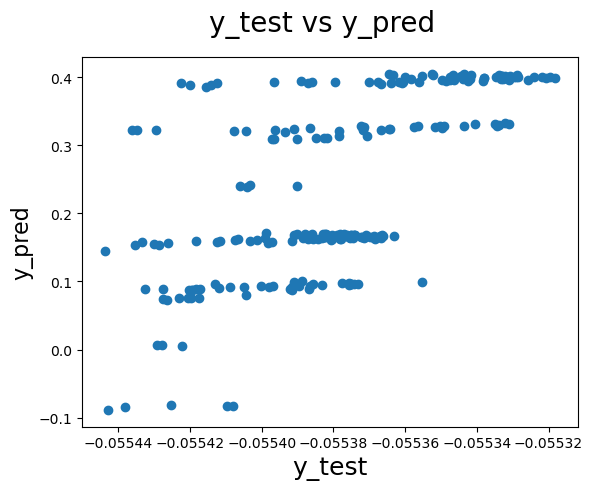

In [329]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_l6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

## Final Model Interpretation


**Hypothesis Testing**

H0:B1=B2=...=Bn=0

H1: at least one B(i) != 0

**lr6 model coefficient values**

- const            0.2127
- temp             0.5128
- windspeed       -0.1760
- mnth_2          -0.0820
- weathersit_2    -0.0705
- weathersit_3    -0.2437
- yr               0.2337


**Insights**
From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS


### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 274.5
- Prob (F-statistic): 4.10e-155

The F-Statistics value of 274 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant


## The equation of best fitted surface based on model lr6:

**cnt** = 0.2127 + (**yr** × 0.2337) + (**temp** × 0.5128) − (**windspeed** × 0.1760) + (**mnth_2** × 0.0820) − (**weathersit2** × 0.0705) − (**weathersit3** × 0.2437)

## R^2 value for Test

In [344]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_l6)
r2

-115114102.95877175

Adjusted R^2 Value for TEST

In [342]:
X_test.shape


(219, 29)

In [343]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

-132777113.61911239

## Final Result Comparison
- Train R^2 : 0.766
- Train Adjusted R^2 : 0.763
- Test R^2 : -115114102.95877175
- Test Adjusted R^2 : -132777113.61911239
- This seems to be a really good model that can very well 'Generalize' various datasets

## Splitting the Data into Training and Testing Sets

We will split the data into TRAIN and TEST dataset (70:30 ratio)

**Libraries**

In [98]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [99]:
df_train.shape

(510, 30)

In [100]:
df_test.shape

(219, 30)

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null    uin

In [102]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null    uint

### Rescaling the Features 

There is a lot of variation in the numerical value of all the columns. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. So, this will create problems at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling.

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()

In [105]:
# Checking the values before scaling
df_train.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
483   1        0           0  18.791653  22.50605  58.7083   7.832836  6304   
650   1        0           0  16.126653  19.56980  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.16460  55.0833  10.500039  4266   
714   1        0           0  14.862500  18.49690  83.8750   6.749714  3786   
8     0        0           0   5.671653   5.80875  43.4167  24.250650   822   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
483         1         0  ...        0        0          0          0   
650         0         0  ...        0        0          0          0   
212         0         1  ...        0        0          1          0   
714         0         0  ...        0        1          0          0   
8           0         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
483          0          0          0          0             0             0  
650          0          0          0          1             0             0  
212          0          0          0          0             0             0  
714          0          0          0          0             1             0  
8            0          0          0          0             0             0  

[5 rows x 30 columns]

In [106]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [107]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [108]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
483   1        0           0  0.497426  0.487055  0.609956   0.194850   
650   1        0           0  0.416433  0.409971  0.513852   0.255118   
212   0        0           1  0.887856  0.819376  0.572294   0.276919   
714   1        0           0  0.378013  0.381804  0.871429   0.161523   
8     0        0           0  0.098690  0.048706  0.451083   0.700017   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
483  0.722734         1         0  ...        0        0          0   
650  0.815347         0         0  ...        0        0          0   
212  0.488265         0         1  ...        0        0          1   
714  0.433042         0         0  ...        0        1          0   
8    0.092039         0         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
483          0          0          0          0          0             0   
650          0          0          0          0          1             0   
212          0          0          0          0          0             0   
714          0          0          0          0          0             1   
8            0          0          0          0          0             0   

     weathersit_3  
483             0  
650             0  
212             0  
714             0  
8               0  

[5 rows x 30 columns]

In [109]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.682353    0.540901    0.515631    0.647390   
std      0.500487    0.151726    0.466018    0.227898    0.213626    0.149722   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.343228    0.335807    0.536147   
50%      1.000000    0.000000    1.000000    0.540519    0.525578    0.646367   
75%      1.000000    0.000000    1.000000    0.740406    0.692378    0.757900   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.346318    0.515144    0.247059    0.262745  ...    0.086275   
std      0.160266    0.224281    0.431725    0.440557  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.230784    0.359468    0.000000    0.000000  ...    0.000000   
50%      0.325635    0.516337    0.000000    0.000000  ...    0.000000   
75%      0.434287    0.685861    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.076471    0.139216    0.141176    0.150980    0.129412    0.145098   
std      0.266010    0.346511    0.348545    0.358381    0.335985    0.352545   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  510.000000    510.000000    510.000000  
mean     0.150980      0.341176      0.025490  
std      0.358381      0.474570      0.157763  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

## Building a linear Model

**Dividing into X and Y sets for the model building**


In [110]:
y_train = df_train.pop('cnt')
X_train = df_train

#### RFE ###

**Recursive feature elimination**: 

We will be using the LinearRegression function from SciKit Learn for RFE.

In [111]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [112]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running rfe
rfe = RFE(lm, n_features_to_select=15)  

rfe = rfe.fit(X_train, y_train)

In [113]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 7),
 ('mnth_4', False, 10),
 ('mnth_5', False, 8),
 ('mnth_6', False, 9),
 ('mnth_7', False, 15),
 ('mnth_8', False, 11),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 6),
 ('weathersit_3', True, 1)]

In [114]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [115]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

**Iteration 1**

In [116]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [117]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [118]:
# Check the parameters obtained
lr1.params

const           0.266757
yr              0.225744
holiday        -0.029078
workingday      0.012076
temp            0.603182
hum            -0.279365
windspeed      -0.209574
season_2        0.083297
season_4        0.138869
mnth_9          0.102467
weekday_1      -0.021819
weekday_2      -0.008206
weekday_3       0.005685
weekday_4       0.002158
weekday_5       0.005180
weathersit_3   -0.216195
dtype: float64

In [119]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.87e-177
Time:                        13:23:42   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597   

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1        holiday    inf
2     workingday    inf
9      weekday_1    inf
10     weekday_2    inf
11     weekday_3    inf
12     weekday_4    inf
13     weekday_5    inf
4            hum  10.95
3           temp   7.13
5      windspeed   4.18
0             yr   2.00
7       season_4   1.62
6       season_2   1.58
8         mnth_9   1.20
14  weathersit_3   1.09

**Iteration 2**

Removing all the variables which have VIF=inf

In [121]:
drop_col = ['holiday','workingday','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5']

In [122]:
X_train_new = X_train_rfe.drop(drop_col, axis = 1)

In [123]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [124]:
# Check the parameters obtained
lr2.params

const           0.274451
yr              0.224716
temp            0.603323
hum            -0.281595
windspeed      -0.212343
season_2        0.084410
season_4        0.138224
mnth_9          0.104264
weathersit_3   -0.211118
dtype: float64

In [125]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     290.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.31e-183
Time:                        13:28:19   Log-Likelihood:                 480.37
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     501   BIC:                            -904.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2745      0.027     10.146   

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  41.19
3           hum   1.26
6      season_4   1.24
2          temp   1.19
5      season_2   1.18
4     windspeed   1.17
7        mnth_9   1.11
8  weathersit_3   1.10
1            yr   1.03